### Project - Car price Predicton of Used Cars

### About the dataset- This dataset contains information about used cars listed on www.cardekho.com 
Dataset has follwoing columns
 

- Car_Name
- Year
- Selling_Price
- Present_Price
- Kms_Driven
- Fuel_Type
- Seller_Type
- Transmission
- Owner

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data
data =pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
#Check the shape of data
data.shape

(301, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
data.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [6]:
# Check for missing values
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

No null values, Proceed


In [7]:
print("Fuel Type",data['Fuel_Type'].unique())
print("*************************************")
print("Owner",data['Owner'].unique())
print("*************************************")
print("Seller Type",data['Seller_Type'].unique())
print("*************************************")
print("Transmission",data['Transmission'].unique())
print("*************************************")
print("Year",data['Year'].unique())
print("*************************************")

Fuel Type ['Petrol' 'Diesel' 'CNG']
*************************************
Owner [0 1 3]
*************************************
Seller Type ['Dealer' 'Individual']
*************************************
Transmission ['Manual' 'Automatic']
*************************************
Year [2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]
*************************************


In [8]:
print("Categorical Data: \n",data.select_dtypes(include=['object']).columns)
print("Numerical Data : \n",data.select_dtypes(include=['int64']).columns)

Categorical Data: 
 Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')
Numerical Data : 
 Index(['Year', 'Kms_Driven', 'Owner'], dtype='object')


### Let's dive into Exploratory Data Analysis

FUEL_TYPE
        counts  Percentge
Petrol     239  79.401993
Diesel      60  19.933555
CNG          2   0.664452


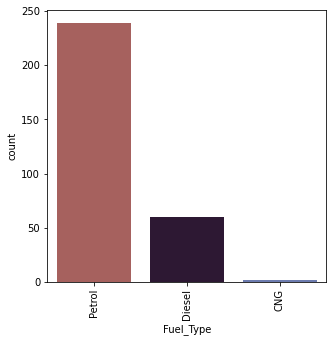

SELLER_TYPE
            counts  Percentge
Dealer         195  64.784053
Individual     106  35.215947


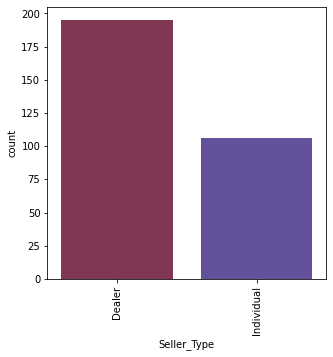

TRANSMISSION
           counts  Percentge
Manual        261  86.710963
Automatic      40  13.289037


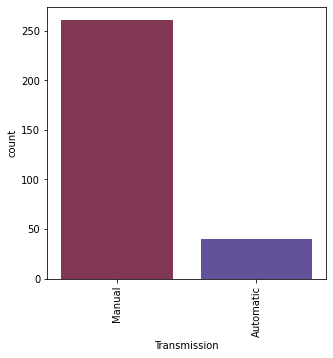

In [9]:
# Let's write a  function which will iterate through all the columns.
Categorical_Features = ['Fuel_Type', 'Seller_Type', 'Transmission']

for col in Categorical_Features:
        x = pd.DataFrame({"counts":data[col].value_counts(),"Percentge": data[col].value_counts(normalize= True)*100},index=data[col].value_counts().index)
        print(col.upper()) # print column name})
        print(x) # print dataframe
        plt.figure(figsize=(5,5))
        sns.countplot(data[col],palette='twilight_r')
        plt.xticks(rotation=90)
        plt.show()
        

YEAR
      counts  Percentge
2015      61  20.265781
2016      50  16.611296
2014      38  12.624585
2017      35  11.627907
2013      33  10.963455
2012      23   7.641196
2011      19   6.312292
2010      15   4.983389
2008       7   2.325581
2009       6   1.993355
2006       4   1.328904
2005       4   1.328904
2007       2   0.664452
2003       2   0.664452
2018       1   0.332226
2004       1   0.332226


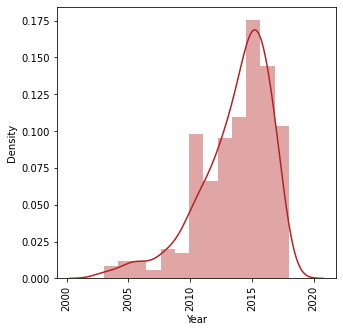

KMS_DRIVEN
        counts  Percentge
15000        9   2.990033
45000        9   2.990033
35000        5   1.661130
25000        5   1.661130
50000        5   1.661130
...        ...        ...
1000         1   0.332226
500000       1   0.332226
11800        1   0.332226
5400         1   0.332226
4100         1   0.332226

[206 rows x 2 columns]


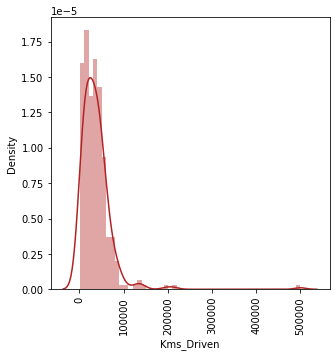

OWNER
   counts  Percentge
0     290  96.345515
1      10   3.322259
3       1   0.332226


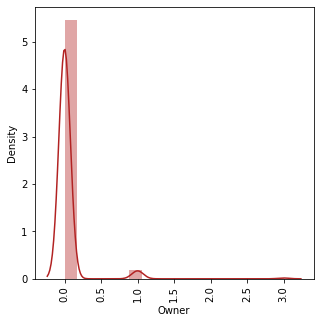

In [10]:
Numerical_Features = ['Year', 'Kms_Driven', 'Owner']

for col in Numerical_Features:
        x = pd.DataFrame({"counts":data[col].value_counts(),"Percentge": data[col].value_counts(normalize= True)*100},index=data[col].value_counts().index)
        print(col.upper()) # print column name})
        print(x) # print dataframe
        plt.figure(figsize=(5,5))
        sns.distplot(data[col],hist=True,color='firebrick')
        plt.xticks(rotation=90)
        plt.show()

<AxesSubplot:xlabel='Year', ylabel='count'>

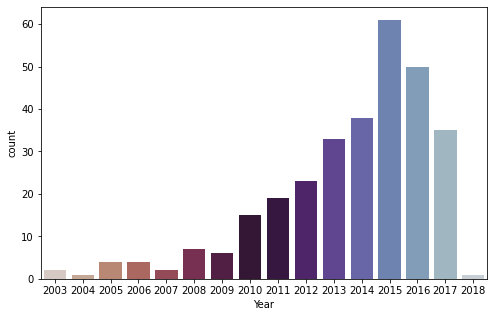

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(x='Year', data=data,palette='twilight_r')

- Most of the cars were sold in the year 2015

Text(0.5, 0, 'Number of cars sold')

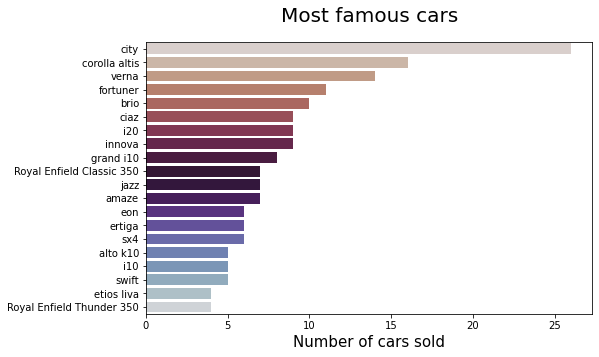

In [12]:
plt.figure(figsize=(8,5))
brand=data['Car_Name'].value_counts()[:20]
sns.barplot(x=brand,y=brand.index,palette='twilight_r')
plt.title("Most famous cars",size=20,pad=20)
plt.xlabel("Number of cars sold",size=15)

- city is the most popular car, followed by corolla altis,verna,fortuner and so on....

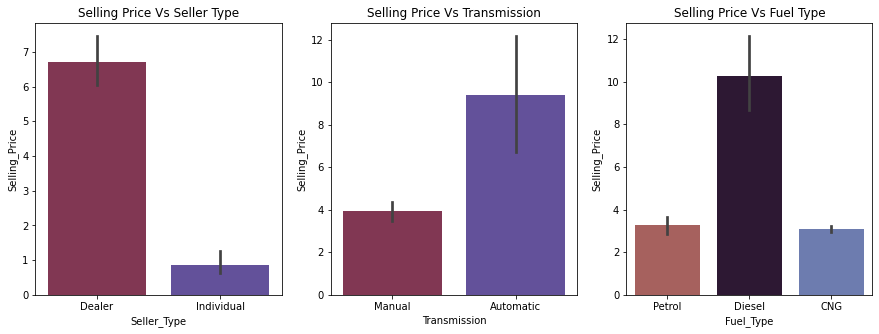

<Figure size 432x288 with 0 Axes>

In [13]:
#Seller Type, Transmission and Fuel Type Visualization with target variable i.e Selling Price
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
sns.barplot(data['Seller_Type'], data['Selling_Price'],palette='twilight_r')
plt.title('Selling Price Vs Seller Type')

plt.subplot(1,3,2)
sns.barplot(data['Transmission'],data['Selling_Price'],palette='twilight_r')
plt.title('Selling Price Vs Transmission')

plt.subplot(1,3,3)
sns.barplot(data['Fuel_Type'],data['Selling_Price'],palette='twilight_r')
plt.title('Selling Price Vs Fuel Type')

plt.show()
plt.tight_layout()

- Selling Price of cars is higher when sold by Dealers rather than by Individuals
- Automatic cars have high selling price compared to manual.
- Diesel cars are costly than petrol and CNG

In [14]:
# Let's create one more column of car_age
data['Car_Age']=2021-data['Year']
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [15]:
data.drop(['Year'], axis=1,inplace=True)
data.head() 

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


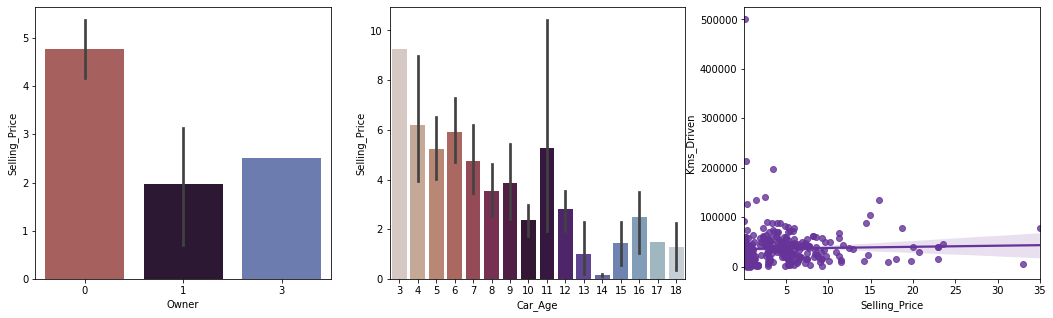

<Figure size 432x288 with 0 Axes>

In [16]:
plt.figure(figsize=[18,5])
plt.subplot(1,3,1)
sns.barplot(data['Owner'],data['Selling_Price'],palette='twilight_r')

plt.subplot(1,3,2)
sns.barplot(data['Car_Age'],data['Selling_Price'],palette='twilight_r')

plt.subplot(1,3,3)
sns.regplot(data['Selling_Price'],data['Kms_Driven'],color='rebeccapurple')
plt.show()
plt.tight_layout()

- If cars are used by less no. of users, Selling Price is high
- Selling Price of cars 3 years old is high. More old is the car, less will be the Selling Price
- More kms driven less will be the Selling Price

In [17]:
data.drop(['Car_Name'], axis=1,inplace=True)
data.head() 

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [18]:
# Dealing With Categorical Variables, creagting dummie
df = pd.get_dummies(data,drop_first=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


### Feature Selection

<AxesSubplot:>

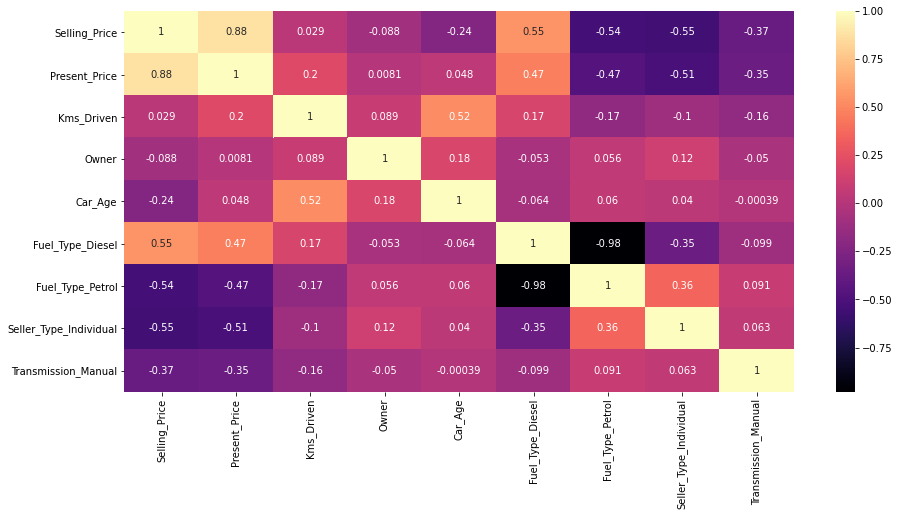

In [19]:
# correlation heat map
plt.figure(figsize=[15,7])
sns.heatmap(df.corr(), annot=True,cmap='magma')

In [20]:
# Select independent and dependent feature
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [21]:
X.head()

,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [22]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [23]:
# Feature importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)


ExtraTreesRegressor()

In [24]:
print(model.feature_importances_)

[0.39715223 0.04238041 0.0004965  0.07716362 0.21971814 0.00766658
 0.11505152 0.140371  ]


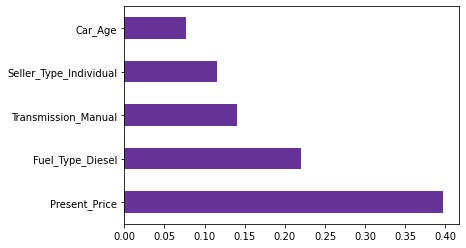

In [25]:
# Plot the graph of feature importnace for better visualization
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh',color='rebeccapurple')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(270, 8)
(31, 8)
(270,)
(31,)


### Machine Learning Models
#### 1.Linear regression

In [28]:
from sklearn.linear_model import LinearRegression
Linear_model = LinearRegression()
Linear_model.fit(X_train,y_train)
print(Linear_model.score(X_test,y_test))

0.8875139878310375


#### 2. Decision Tree Regressor

In [29]:
from sklearn.tree import DecisionTreeRegressor
DTree_Model = DecisionTreeRegressor()
DTree_Model.fit(X_train,y_train)
print(DTree_Model.score(X_test,y_test))

0.9450864857728106


#### 3.Random Forest Regressor

In [30]:
from sklearn.ensemble import RandomForestRegressor
RF_Model =  RandomForestRegressor()
RF_Model.fit(X_train,y_train)
print(RF_Model.score(X_test,y_test))

0.982239213857834


#### 4. Gradient Boosting Regressor


In [31]:
from sklearn.ensemble import GradientBoostingRegressor
Gboost_Model = GradientBoostingRegressor()
Gboost_Model.fit(X_train,y_train)
print(Gboost_Model.score(X_test,y_test))

0.9779314031114364


#### 5. XG Boost Regressor

In [32]:
import xgboost
from xgboost import XGBRegressor
XGBoost_model = XGBRegressor()
XGBoost_model.fit(X_train,y_train)
print(XGBoost_model.score(X_test,y_test))

0.9518532967650999


- Out of all the above models, we got the best score by applyning Random Forest Regressor,So let's apply hyperparameters and 
and retrain RF model with best parameters and check the score

In [33]:
from sklearn.model_selection import RandomizedSearchCV

 
# Number of trees in Gradient boosting
n_estimators=[int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Maximum number of levels in a tree
max_depth=[int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split an internal node
min_samples_split=[2, 5, 10, 15, 100]
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7,10]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

In [34]:
# Hyperparameters 
random_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

In [35]:
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 7, 10], 'max_features': ['auto', 'sqrt']}


In [36]:
RF_Tuned= RandomizedSearchCV(estimator=RF_Model, param_distributions=random_grid , scoring='neg_mean_squared_error', n_iter = 10, cv = 5, 
                             verbose=2,random_state=42 ,n_jobs=1)

In [37]:
RF_Tuned.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   0.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_e

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 7, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [38]:
RF_Tuned.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [47]:
Final_RF_Model = RandomForestRegressor(n_estimators= 1100,
                     min_samples_split= 10,
                     min_samples_leaf=2,
                     max_features= 'auto',
                     max_depth= 15,
                     )
Final_RF_Model.fit(X_train,y_train)
print(Final_RF_Model.score(X_test,y_test))

0.967949920163513


In [48]:
predictions=Final_RF_Model.predict(X_test)

In [49]:
predictions

array([ 5.72778931,  8.59974766,  0.19886124,  5.7311526 , 21.80534029,
        0.64451619,  0.60121136,  3.07621274, 21.00539272,  0.67890794,
       13.6180791 ,  6.87179685,  5.0429994 ,  9.81722145,  0.28373352,
        4.68031623, 10.42609663,  4.28097736, 21.79219256,  2.62757124,
        3.98710836,  0.56336213,  4.26835669,  4.42851135,  0.43598707,
        5.83041978,  0.32741216,  4.05209335,  4.92529826,  0.45019199,
        2.88414442])

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

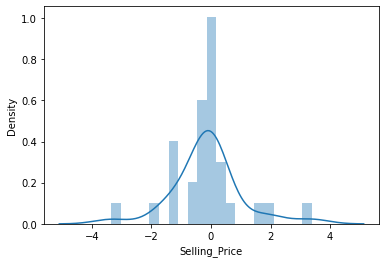

In [50]:
sns.distplot(y_test-predictions)

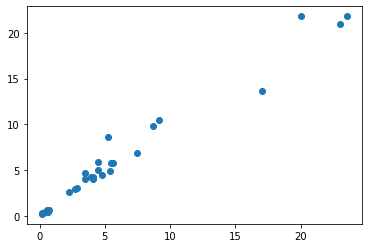

In [51]:
plt.scatter(y_test,predictions)

In [52]:
import pickle
# open a file, where you ant to store the data
file = open('Car_Price_Prediction_Model.pkl', 'wb')

# dump information to that file
pickle.dump(Final_RF_Model, file)
file.close()